# Tomisin Adeyemi - FML HW1

In [2]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

## EDA

In [3]:
data_PD = pd.read_csv("housingUnits.csv")

In [4]:
data_PD.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,41,880,223,322,126,208.1300,1,452600
1,21,7099,1338,2401,1138,207.5350,1,358500
2,52,1467,328,496,177,181.4350,1,352100
3,52,1274,293,558,219,141.0775,1,341300
4,52,1627,357,565,259,96.1550,1,342200


In [5]:
data_PD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   housing_median_age  20640 non-null  int64  
 1   total_rooms         20640 non-null  int64  
 2   total_bedrooms      20640 non-null  int64  
 3   population          20640 non-null  int64  
 4   households          20640 non-null  int64  
 5   median_income       20640 non-null  float64
 6   ocean_proximity     20640 non-null  int64  
 7   median_house_value  20640 non-null  int64  
dtypes: float64(1), int64(7)
memory usage: 1.3 MB


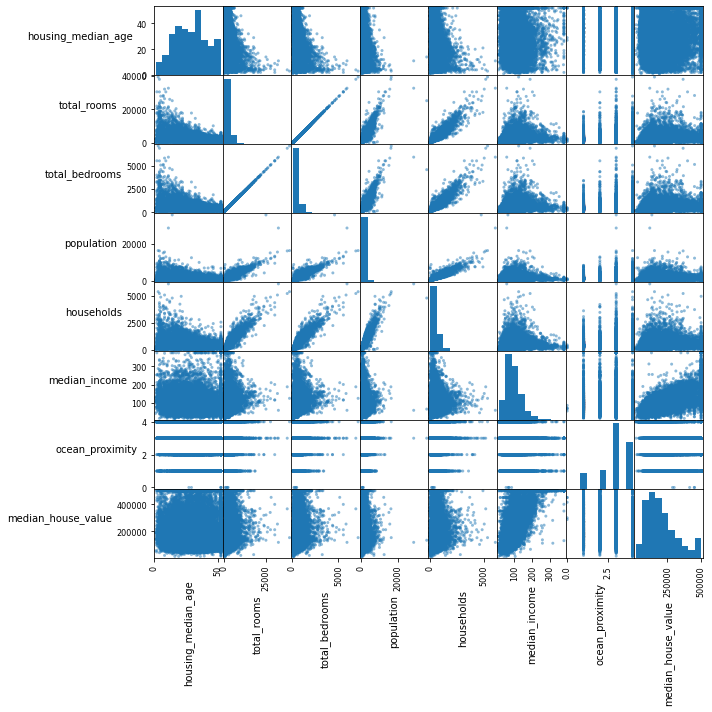

In [6]:
# plot correlation plot / correlation matrix
axes = pd.plotting.scatter_matrix(data_PD, figsize=(10,10))
for ax in axes.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')

plt.tight_layout()
plt.gcf().subplots_adjust(wspace=0, hspace=0)
plt.show()

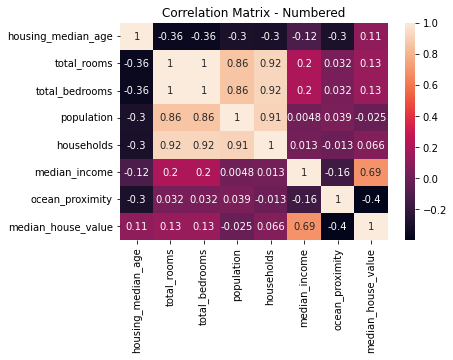

In [7]:
sns.heatmap(data_PD.corr(), annot = True)
plt.title("Correlation Matrix - Numbered")
plt.show()

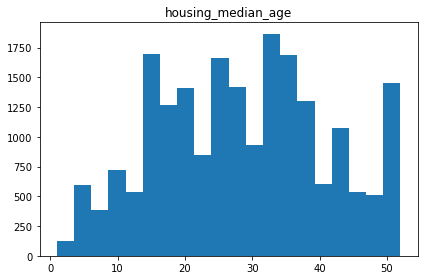

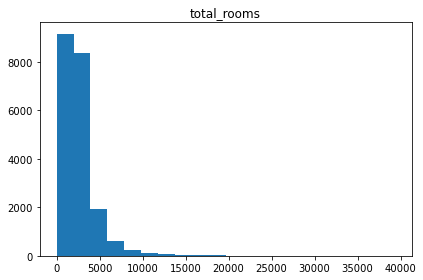

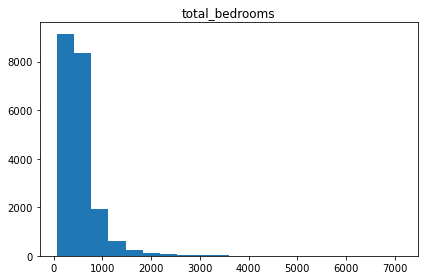

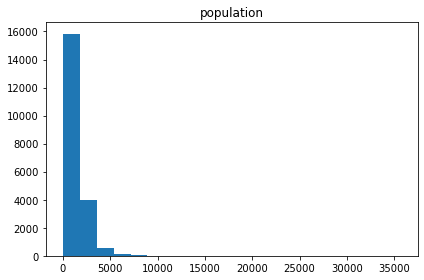

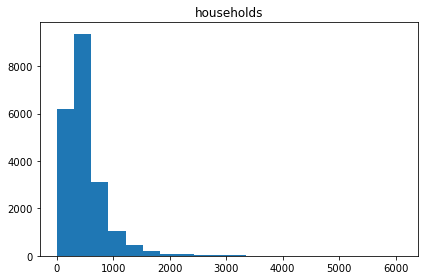

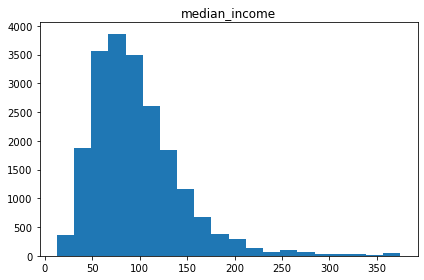

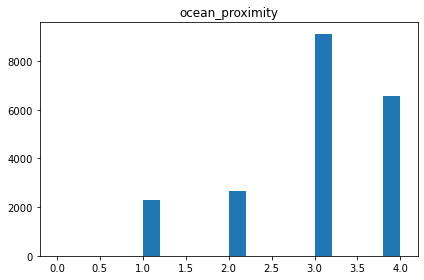

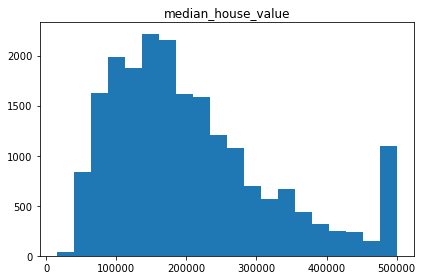

In [8]:
# histograms for each feature
for feature in data_PD.columns:
    fig, axs = plt.subplots(1, 1, sharey=True, tight_layout=True)
    axs.hist(data_PD[feature], bins=20)
    plt.title(feature)

In [9]:
data_PD.describe()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,28.639486,2635.763081,537.735271,1425.476744,499.539680,96.766775,2.965988,206855.816909
std,12.585558,2181.615252,391.392913,1132.462122,382.329753,47.495543,0.943948,115395.615874
min,1.000000,2.000000,65.000000,3.000000,1.000000,12.497500,0.000000,14999.000000
25%,18.000000,1447.750000,324.750000,787.000000,280.000000,64.085000,3.000000,119600.000000
50%,29.000000,2127.000000,446.000000,1166.000000,409.000000,88.370000,3.000000,179700.000000
75%,37.000000,3148.000000,630.000000,1725.000000,605.000000,118.581250,4.000000,264725.000000
max,52.000000,39320.000000,7119.000000,35682.000000,6082.000000,375.002500,4.000000,500001.000000


## Number 2

To meaningfully use predictor variables 2 (number of rooms) and 3 (number of bedrooms), you will need to standardize/normalize them. Using the data, is it better to normalize them by population (4) or number of households (5)? 

In [29]:
data_PD.corr()['median_house_value'].sort_values(ascending=False)

median_house_value        1.000000
median_income             0.688075
rooms_per_person          0.209482
rooms_per_household       0.151948
total_bedrooms            0.134154
total_rooms               0.134153
bedrooms_per_person       0.113095
housing_median_age        0.105623
households                0.065843
bedrooms_per_household    0.058260
population               -0.024650
ocean_proximity          -0.397251
Name: median_house_value, dtype: float64

In [30]:
data_PD['rooms_per_household'] = data_PD['total_rooms'] / data_PD['households']
data_PD['bedrooms_per_household'] = data_PD['total_bedrooms'] / data_PD['households']
data_PD['rooms_per_person'] = data_PD['total_rooms'] / data_PD['population']
data_PD['bedrooms_per_person'] = data_PD['total_bedrooms'] / data_PD['population']

In [31]:
correlations = data_PD.corr()['median_house_value']

In [32]:
correlations['rooms_per_person']

0.20948196900669194

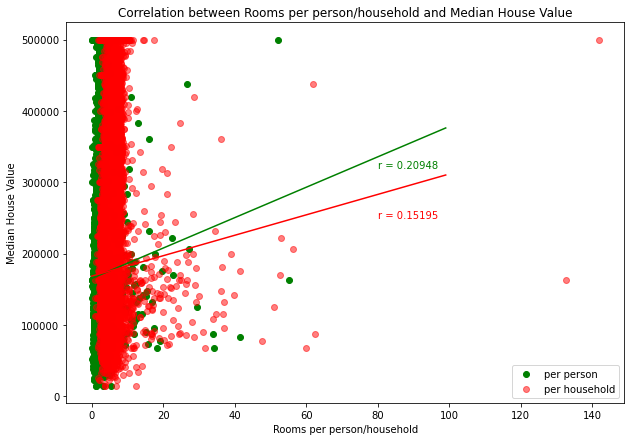

In [33]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot()

ax.scatter(data_PD['rooms_per_person'], data_PD['median_house_value'], c='g',label='per person')
ax.scatter(data_PD['rooms_per_household'], data_PD['median_house_value'], c='r', alpha=0.5, label='per household')

m1, c1 = np.polyfit(data_PD['rooms_per_person'], data_PD['median_house_value'], 1)
x1 = np.linspace(0, 10, 100)
y1 = m1 * x1 + c1
plt.plot(y1, c='g')
plt.text(80, 320000, 'r = {:.5f}'.format(correlations['rooms_per_person']), c='g')

m2, c2 = np.polyfit(data_PD['rooms_per_household'], data_PD['median_house_value'], 1)
x2 = np.linspace(0, 20, 100)
y2 = m2 * x2 + c2
plt.plot(y2, c='r')
plt.text(80, 250000, 'r = {:.5f}'.format(correlations['rooms_per_household']), c='r')

plt.ylabel('Median House Value')
plt.xlabel('Rooms per person/household')


ax.set_title("Correlation between Rooms per person/household and Median House Value")
plt.legend(loc='lower right')

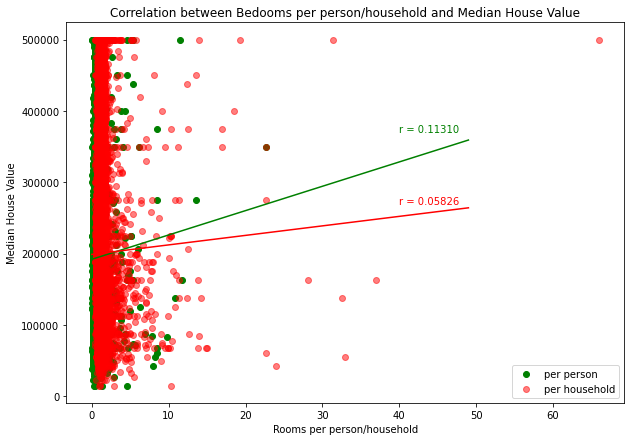

In [34]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot()

ax.scatter(data_PD['bedrooms_per_person'], data_PD['median_house_value'], c='g',label='per person')
ax.scatter(data_PD['bedrooms_per_household'], data_PD['median_house_value'], c='r', alpha=0.5, label='per household')

m1, c1 = np.polyfit(data_PD['bedrooms_per_person'], data_PD['median_house_value'], 1)
x1 = np.linspace(0, 5, 50)
y1 = m1 * x1 + c1
plt.plot(y1, c='g')
plt.text(40, 370000, 'r = {:.5f}'.format(correlations['bedrooms_per_person']), c='g')

m2, c2 = np.polyfit(data_PD['bedrooms_per_household'], data_PD['median_house_value'], 1)
x2 = np.linspace(0, 10, 50)
y2 = m2 * x2 + c2
plt.plot(y2, c='r')
plt.text(40, 270000, 'r = {:.5f}'.format(correlations['bedrooms_per_household']), c='r')

plt.ylabel('Median House Value')
plt.xlabel('Rooms per person/household')


ax.set_title("Correlation between Bedooms per person/household and Median House Value")
plt.legend(loc='lower right')

In [35]:
data_PD.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,rooms_per_household,bedrooms_per_household,rooms_per_person,bedrooms_per_person
0,41,880,223,322,126,208.1300,1,452600,6.984127,1.769841,2.732919,0.692547
1,21,7099,1338,2401,1138,207.5350,1,358500,6.238137,1.175747,2.956685,0.557268
2,52,1467,328,496,177,181.4350,1,352100,8.288136,1.853107,2.957661,0.661290
3,52,1274,293,558,219,141.0775,1,341300,5.817352,1.337900,2.283154,0.525090
4,52,1627,357,565,259,96.1550,1,342200,6.281853,1.378378,2.879646,0.631858


In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
def compute_linear_regression(x, y):
    y = np.array(y).reshape(-1, 1)
    x = np.array(x).reshape(-1, 1)
    model = LinearRegression().fit(x, y)
    R_2 = model.score(x, y)
    print(R_2)

In [38]:
compute_linear_regression(data_PD['bedrooms_per_person'], data_PD['median_house_value'])
compute_linear_regression(data_PD['rooms_per_person'], data_PD['median_house_value'])
compute_linear_regression(data_PD['bedrooms_per_household'], data_PD['median_house_value'])
compute_linear_regression(data_PD['rooms_per_household'], data_PD['median_house_value'])

0.012790501296178869
0.04388269533891975
0.003394278159693287
0.023088282755354128


In [39]:
best_standardizer = zip(["bedrooms_per_person", "rooms_per_person", "bedrooms_per_household", "rooms_per_household"], [0.012790501296178869, 0.04388269533891975,
0.003394278159693287, 0.023088282755354128])

In [40]:
pd.DataFrame(best_standardizer)

,0,1
0,bedrooms_per_person,0.012791
1,rooms_per_person,0.043883
2,bedrooms_per_household,0.003394
3,rooms_per_household,0.023088


## Number 3

Which of the seven variables is most *and* least predictive of housing value, from a simple linear regression perspective? (Hints: a) Make sure to use the standardized/normalized variables from 2. above; b) Make sure to inspect the scatter plots and comment on a potential issue – would the best predictor be even more predictive if not for an unfortunate limitation of the data?)

In [42]:
# drop rooms & rooms per household, same for bedrooms
to_drop = ["total_rooms", "total_bedrooms", "rooms_per_household", "bedrooms_per_household"]

In [43]:
data_PD.drop(data_PD[to_drop], axis=1, inplace=True)

In [44]:
X = data_PD.drop('median_house_value', axis=1)
y = data_PD['median_house_value']

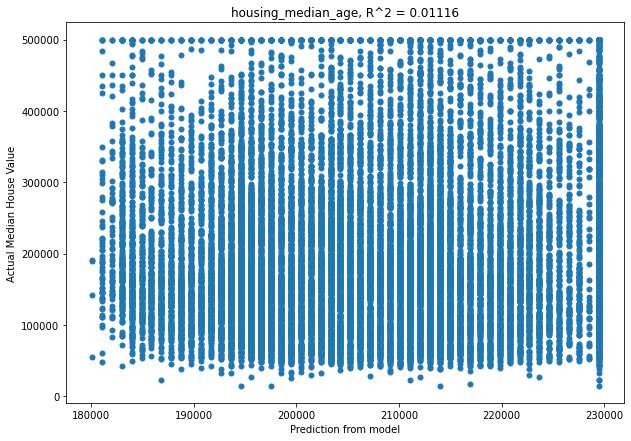

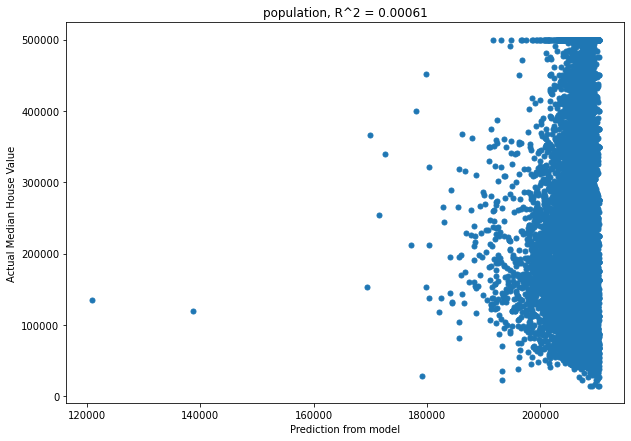

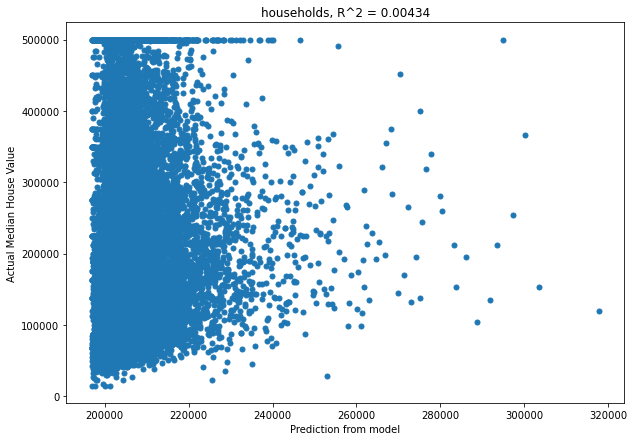

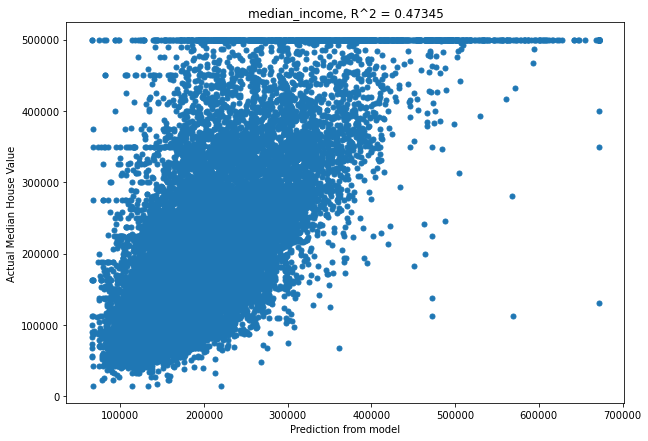

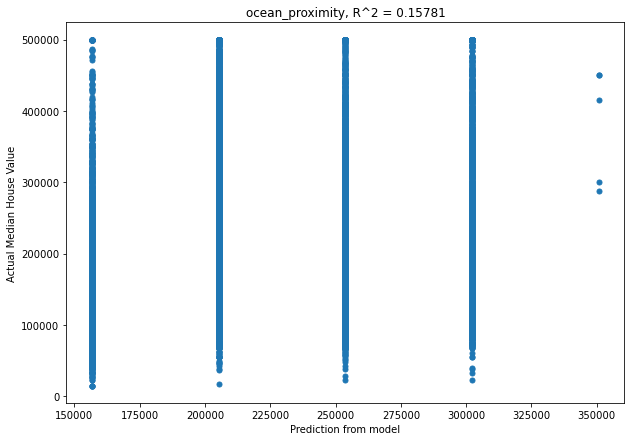

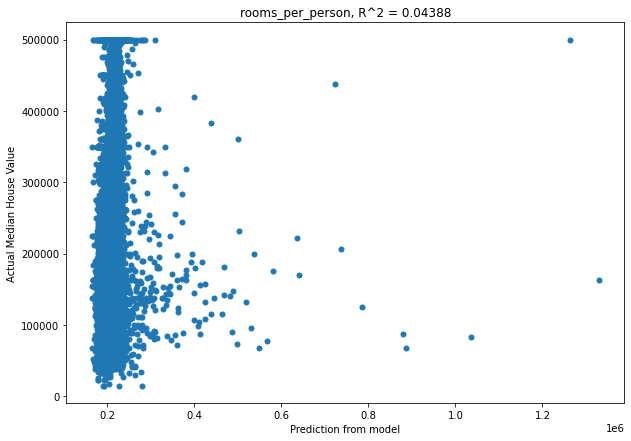

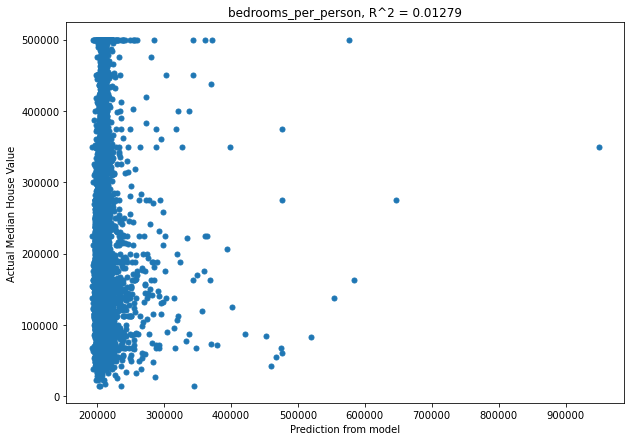

In [45]:
R_2_array = {}
for column in X.columns:
    y_m = np.array(y).reshape(-1, 1)
    X_m = np.array(X[column]).reshape(-1, 1)
    model = LinearRegression().fit(X_m, y_m)
    R_2 = model.score(X_m, y_m)
    R_2_array[column] = R_2
    
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot()

    yHat = model.predict(X_m)
    plt.plot(yHat,y_m,'o', markersize=5) 

    plt.xlabel('Prediction from model') 
    plt.ylabel('Actual Median House Value') 
    
    plt.title(column + ", R^2 = {:.5f}".format(R_2))

In [46]:
R_2_PD = pd.DataFrame(R_2_array, index=['R^2']).transpose()

In [47]:
R_2_PD.sort_values(by='R^2', inplace=True)

In [48]:
R_2_PD

,R^2
population,0.000608
households,0.004335
housing_median_age,0.011156
bedrooms_per_person,0.012791
rooms_per_person,0.043883
ocean_proximity,0.157808
median_income,0.473447


## Number 4:

Putting all predictors together in a multiple regression model – how well do these predictors taken together predict housing value? How does this full model compare to the model that just has the single best predictor from 3.?

In [35]:
X = np.array(X)
y = np.array(y).reshape(-1, 1)

In [36]:
model = LinearRegression().fit(X, y)

In [37]:
R_2 = model.score(X, y)

In [38]:
R_2

0.6006645246293567

Text(0.5, 1.0, 'All Predictors, R^2 = 0.601')

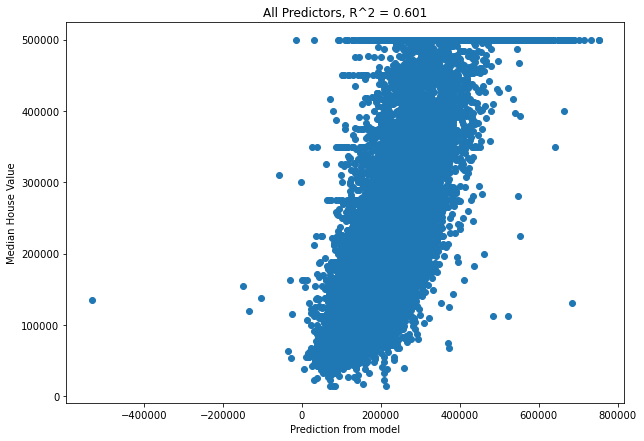

In [39]:
# Visualize: actual vs. predicted income (from model)
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot()

yHat = model.predict(X)
plt.plot(yHat,y,'o') 
plt.xlabel('Prediction from model') 
plt.ylabel('Median House Value')  
plt.title('All Predictors, R^2 = {:.3f}'.format(R_2))

## Number 5:

Considering the relationship between the (standardized) variables 2 and 3, is there potentially a concern regarding collinearity? Is 
there a similar concern regarding variables 4 and 5, if you were to include them in the model? 

In [41]:
data_PD.corr()['median_house_value']

housing_median_age     0.105623
population            -0.024650
households             0.065843
median_income          0.688075
ocean_proximity       -0.397251
median_house_value     1.000000
rooms_per_person       0.209482
bedrooms_per_person    0.113095
Name: median_house_value, dtype: float64

In [42]:
rooms_bedrooms_corr = data_PD.corr()['rooms_per_person']['bedrooms_per_person']

In [43]:
rooms_bedrooms_corr

0.6414637002481975

In [44]:
population_households_corr = data_PD.corr()['households']['population']

In [45]:
population_households_corr

0.9072222660959659

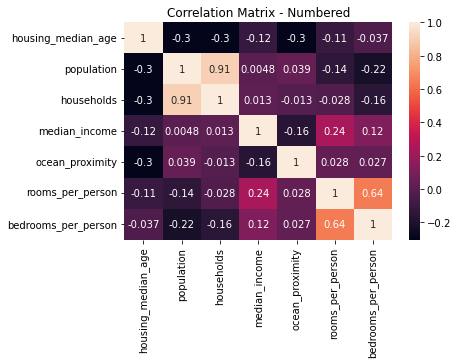

In [46]:
# remove median_house_value
sns.heatmap(data_PD.drop('median_house_value', axis=1).corr(), annot = True)
plt.title("Correlation Matrix - Numbered")
plt.show()

Text(0.5, 1.0, 'Correlation between rooms per person and bedrooms per person, r=0.641')

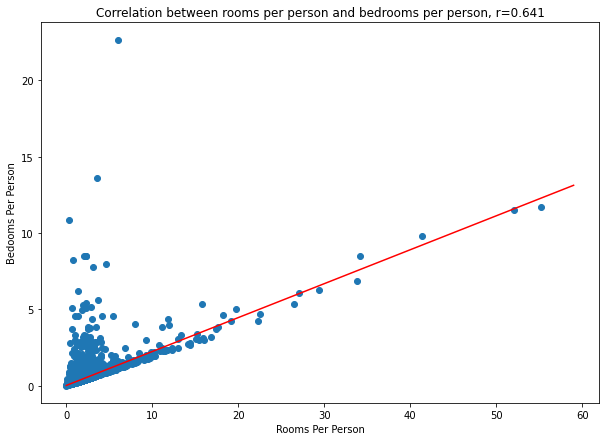

In [47]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot()
ax.scatter(data_PD['rooms_per_person'], data_PD['bedrooms_per_person'])

plt.xlabel('Rooms Per Person')
plt.ylabel('Bedooms Per Person')

m, c = np.polyfit(data_PD['rooms_per_person'], data_PD['bedrooms_per_person'], 1)
x = np.linspace(0, 60, 60)
y = m * x + c

plt.plot(y, c='r')

plt.title("Correlation between rooms per person and bedrooms per person, r={:.3f}".format(rooms_bedrooms_corr))

Text(0.5, 1.0, 'Correlation between households and population, r=0.907')

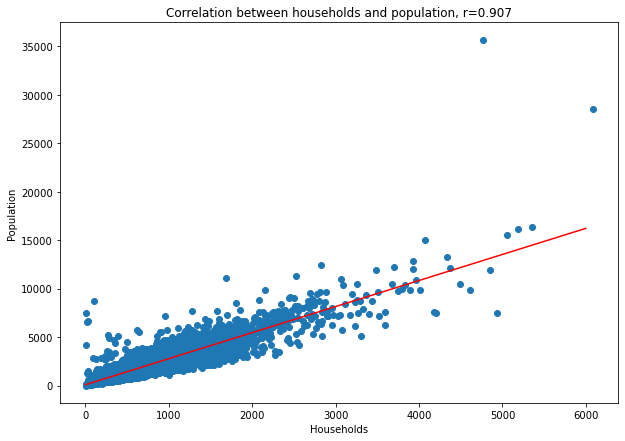

In [48]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot()
ax.scatter(data_PD['households'], data_PD['population'])
plt.xlabel('Households')
plt.ylabel('Population')

m, c = np.polyfit(data_PD['households'], data_PD['population'], 1)
x = np.linspace(0, 6001, 6000)
y = m * x + c

plt.plot(y, c='r')

plt.title("Correlation between households and population, r={:.3f}".format(population_households_corr))

## Extra Credit 1:

Does any of the variables (predictor or outcome) follow a distribution that can reasonably be described as a normal distribution? 

array([[<AxesSubplot:title={'center':'housing_median_age'}>,
        <AxesSubplot:title={'center':'population'}>,
        <AxesSubplot:title={'center':'households'}>],
       [<AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'ocean_proximity'}>,
        <AxesSubplot:title={'center':'median_house_value'}>],
       [<AxesSubplot:title={'center':'rooms_per_person'}>,
        <AxesSubplot:title={'center':'bedrooms_per_person'}>,
        <AxesSubplot:>]], dtype=object)

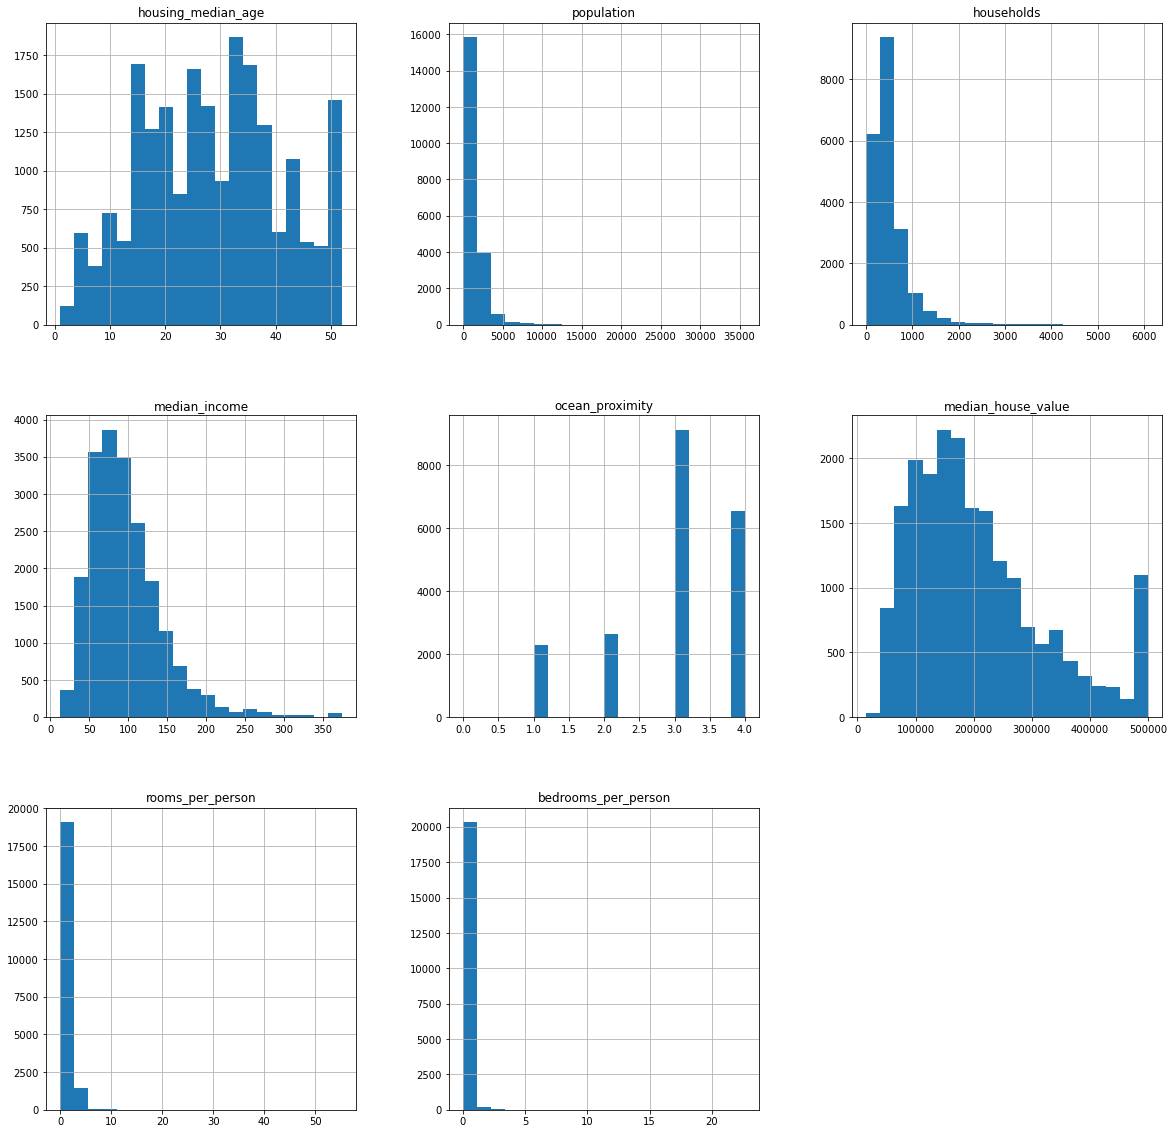

In [34]:
data_PD.hist(bins=20,figsize = (20,20))

## Extra Credit 2:

Examine the distribution of the outcome variable. Are there any characteristics of this distribution that might limit the validity of 
the conclusions when answering the questions above? If so, please comment on this characteristic. 

Text(0.5, 1.0, 'median house value')

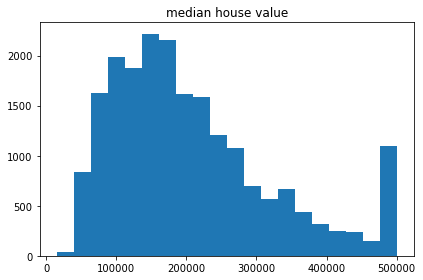

In [38]:
fig, axs = plt.subplots(1, 1, sharey=True, tight_layout=True)
axs.hist(data_PD['median_house_value'], bins=20)
plt.title('median house value')